<a href="https://colab.research.google.com/github/csmotherman/CSC202-Final/blob/main/Ideas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

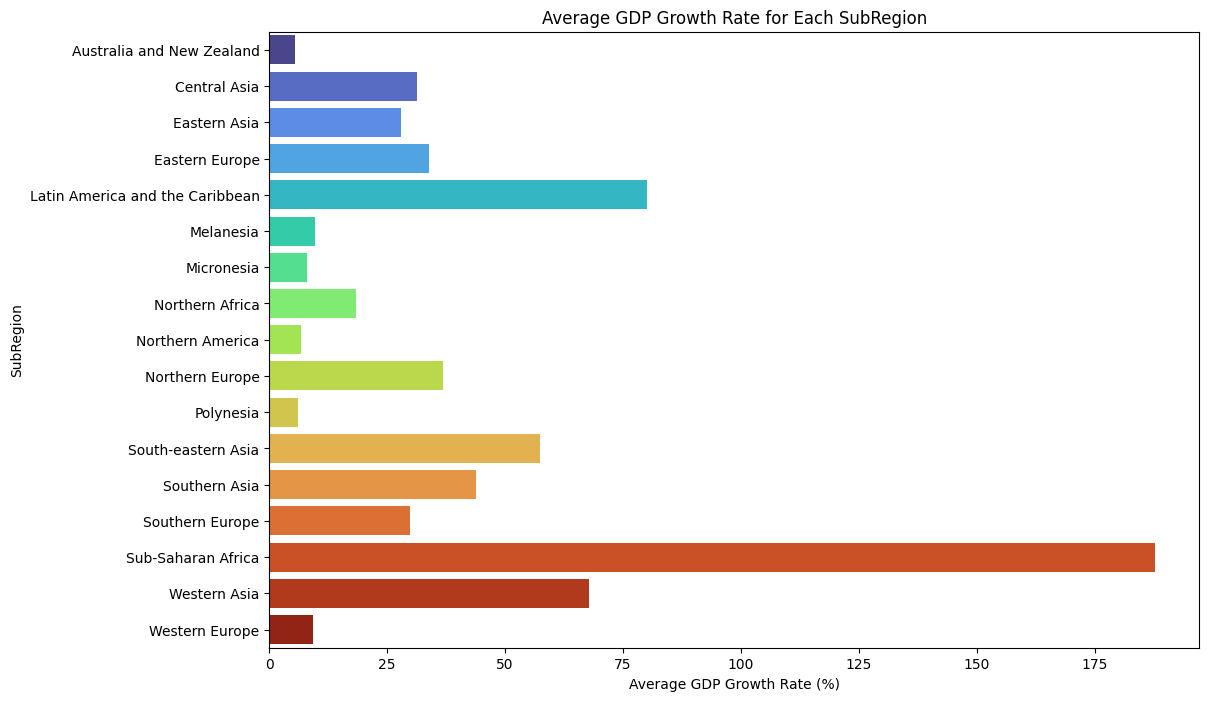

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/world_development_data_imputed.csv')

sum_GDP_growth = df.groupby(['Year', 'SubRegion'])['GDPGrowth%'].sum().reset_index()

avg_GDP_growth_rate = sum_GDP_growth.groupby('SubRegion')['GDPGrowth%'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='GDPGrowth%', y='SubRegion', data=avg_GDP_growth_rate, palette='turbo')
plt.title('Average GDP Growth Rate for Each SubRegion')
plt.xlabel('Average GDP Growth Rate (%)')
plt.ylabel('SubRegion')
plt.grid(False)
plt.show()

In [2]:
column_names = df.columns.tolist()
print("Column names:", column_names)


Column names: ['Year', 'Country', 'Region', 'SubRegion', 'SurfAreaSqKm', 'PopTotal', 'PopDens', 'PopGrowth%', 'GDP', 'GDPGrowth%', 'AdolFertRate', 'AgriValAdd%GDP', 'Exports%GDP', 'FertRate', 'FDINetBoP', 'GNI/CapAtlas', 'GNIAtlas', 'Imports%GDP', 'IndValAdd%GDP', 'InflConsPric%', 'LifeExpBirth', 'MerchTrade%GDP', 'MobileSubs/100', 'MortRateU5', 'NetMigr', 'UrbanPopGrowth%']


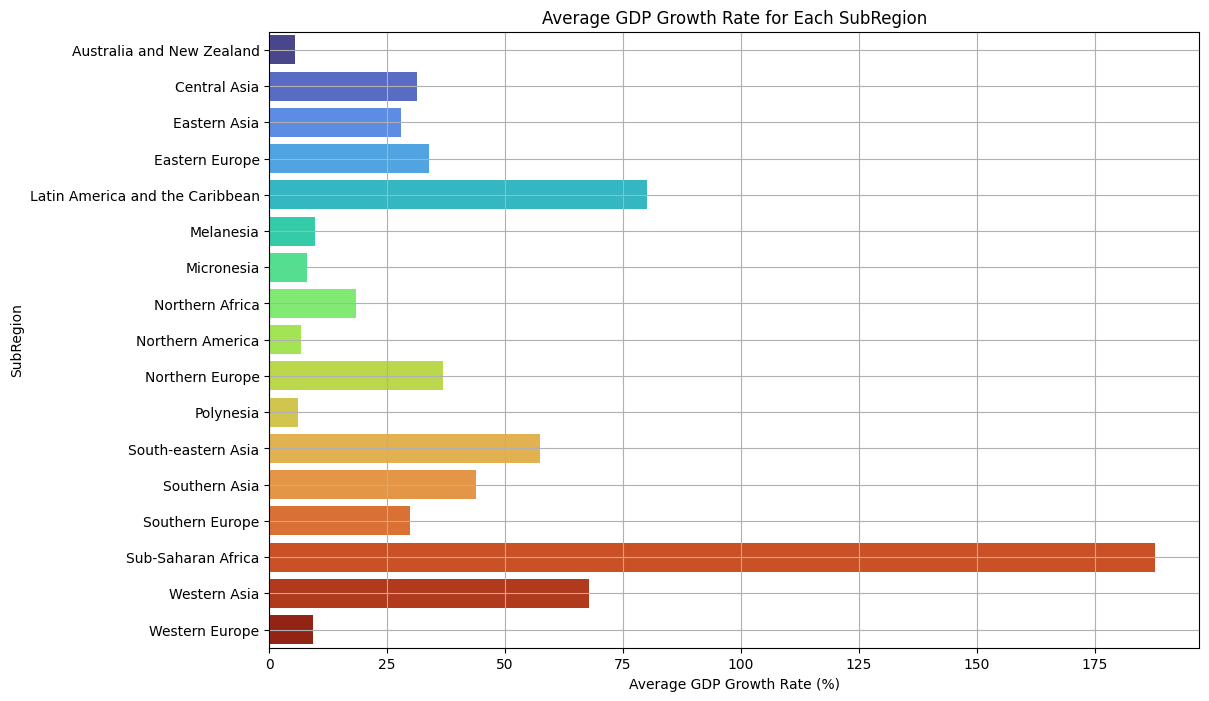

In [3]:
#Better with the grid?
plt.figure(figsize=(12, 8))
sns.barplot(x='GDPGrowth%', y='SubRegion', data=avg_GDP_growth_rate, palette='turbo')
plt.title('Average GDP Growth Rate for Each SubRegion')
plt.xlabel('Average GDP Growth Rate (%)')
plt.ylabel('SubRegion')
plt.grid()
plt.show()

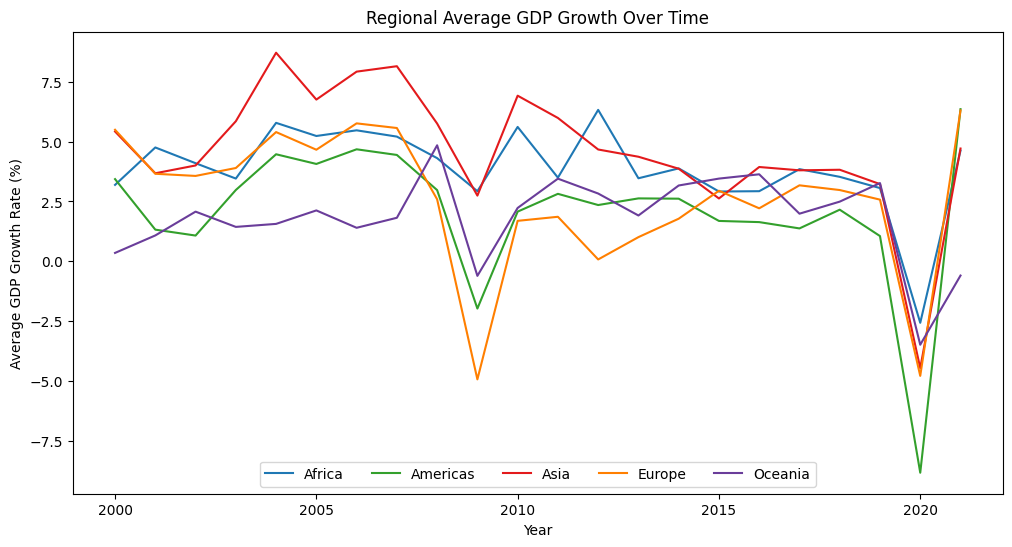

In [4]:
avg_gdp2 = df.groupby(['Year', 'Region'])['GDPGrowth%'].mean().reset_index()

plt.figure(figsize=(12, 6))
regions_palette =['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a']

d=sns.lineplot(x='Year', y='GDPGrowth%', hue='Region', data=avg_gdp2, palette=regions_palette)
d.set_xlabel('Year')
d.set_ylabel('Average GDP Growth Rate (%)')
d.set_title("Regional Average GDP Growth Over Time")
d.legend(loc='lower center', ncol=len(avg_gdp2['Region'].unique()))

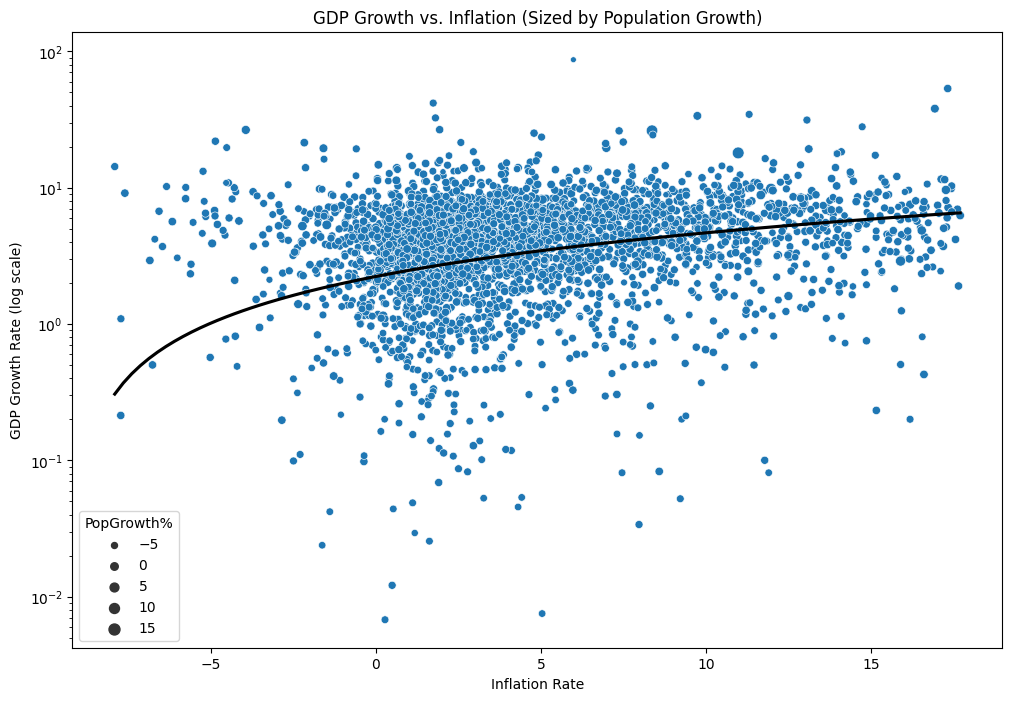

In [5]:
#useing SOC 215 Quantiles knowledge to hopfully remove outliers
Lower_Quantile = df['InflConsPric%'].quantile(0.25)
Upper_Quantile = df['InflConsPric%'].quantile(0.75)
IQR = Upper_Quantile - Lower_Quantile
threshold = 1.5 * IQR

#hopefully remove outliers
revised_df = df[(df['InflConsPric%'] >= Lower_Quantile - threshold) & (df['InflConsPric%'] <= Upper_Quantile + threshold)]

plt.figure(figsize=(12, 8))

sns.scatterplot(x='InflConsPric%', y='GDPGrowth%', size='PopGrowth%', data=revised_df)
sns.regplot(x='InflConsPric%', y='GDPGrowth%', data=revised_df, scatter=False, ci=None, color='black')
plt.yscale('log')
plt.title('GDP Growth vs. Inflation (Sized by Population Growth)')
plt.xlabel('Inflation Rate')
plt.ylabel('GDP Growth Rate (log scale)')
plt.show()


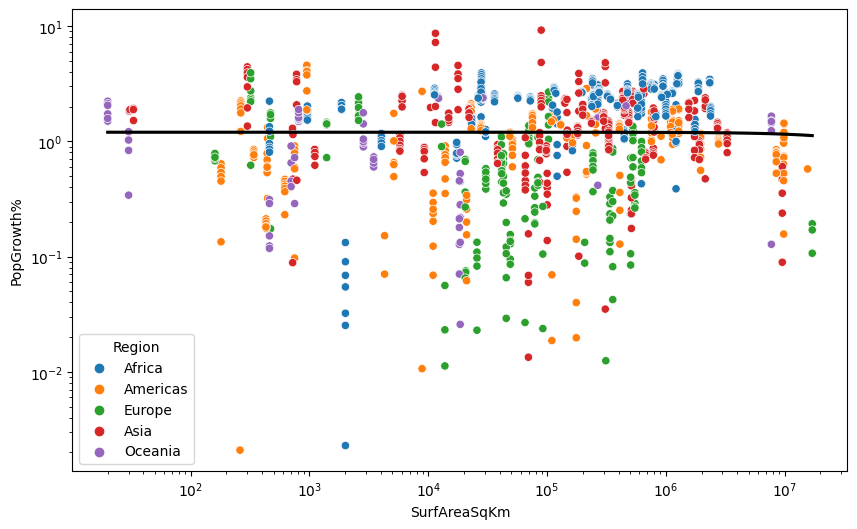

In [6]:
#Reduce the data points
Year2_df = df[(df['Year'] >= 2015) & (df['Year'] <= 2021)]

plt.figure(figsize=(10, 6))

sns.scatterplot(x="SurfAreaSqKm", y="PopGrowth%", data=Year2_df, hue='Region')
sns.regplot(x="SurfAreaSqKm", y="PopGrowth%", data=Year2_df, scatter=False, ci=None, color='black')

#you can try with or without the log scale but it seems to help in this plot
plt.yscale('log')
plt.xscale('log')

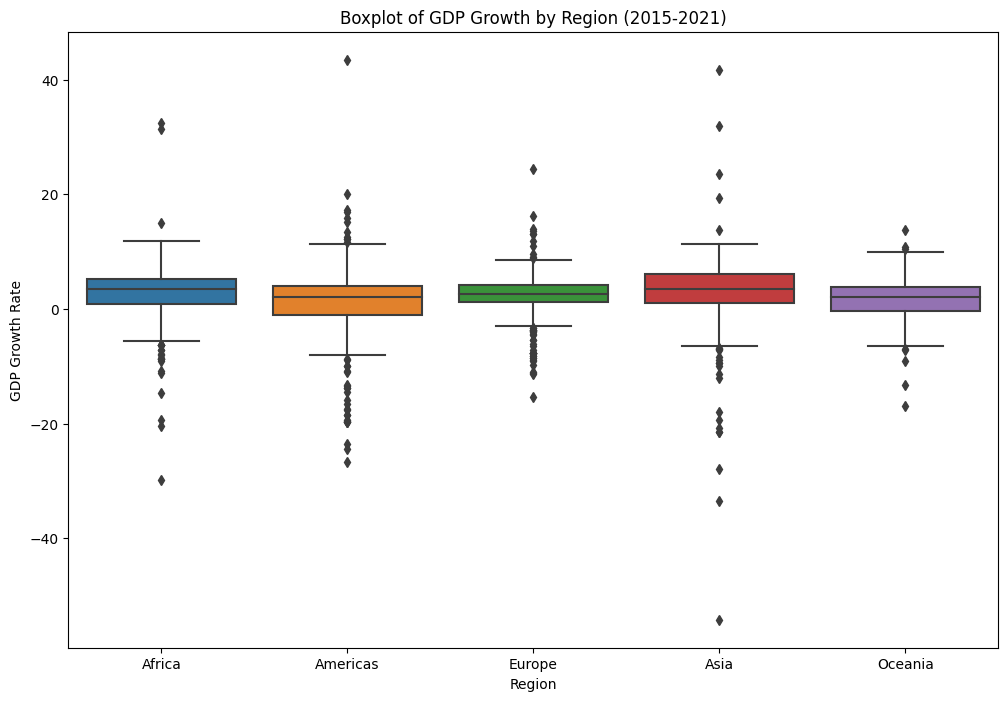

In [21]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Region', y='GDPGrowth%', data=Year2_df)
plt.title('Boxplot of GDP Growth by Region (2015-2021)')
plt.xlabel('Region')
plt.ylabel('GDP Growth Rate')
plt.show()

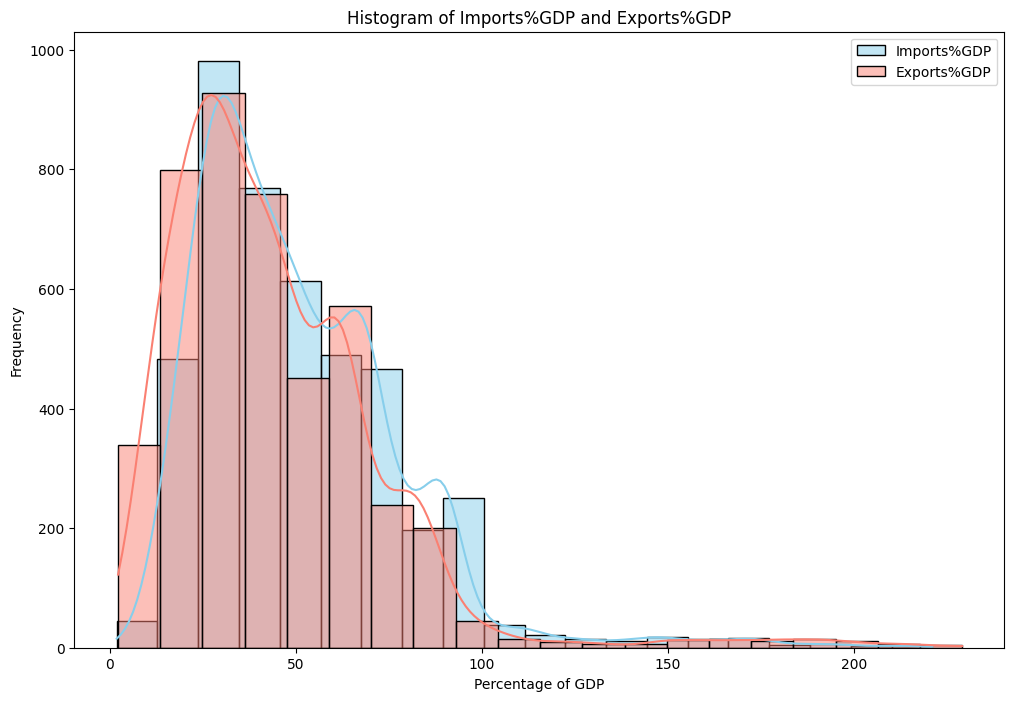

In [19]:
plt.figure(figsize=(12, 8))

sns.histplot(data=df, x='Imports%GDP', bins=20, kde=True, label='Imports%GDP', color='skyblue')
sns.histplot(data=df, x='Exports%GDP', bins=20, kde=True, label='Exports%GDP', color='salmon')

plt.title('Histogram of Imports%GDP and Exports%GDP')
plt.xlabel('Percentage of GDP')
plt.ylabel('Frequency')
plt.legend()
plt.show()